# Describing Data

## Looking back: Exploratory Data Analysis

- In Week 3, we dove deep into **data visualization**.  
- In Week 4, we've learned how to **wrangle** and **clean** our data.

Now we'll turn to **describing** our data––as well as the **foundations of statistics**.

## Goals of this lecture

There are many ways to *describe* a distribution. 

Here, we'll cover:

- Measures of **central tendency**: what's the typical value in this distribution?
- Measures of **variability**: how much do values differ from each other?  
- Detecting (potential) outliers with **z-scores**.
- Measuring how distributions relate with **linear correlations**.  


## Importing relevant libraries

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ### importing seaborn
import pandas as pd
import scipy.stats as ss

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Central Tendency

> **Central Tendency** refers to the "typical value" in a distribution.

Many ways to *measure* what's "typical".

- The `mean`. 
- The `median`.  
- The `mode`. 

### Why is this useful?

- A dataset can contain *lots* of observations.  
   - E.g., $N = 5000$ survey responses about `height`.  
- One way to "describe" this distribution is to **visualize** it.  
- But it's also helpful to reduce that distribution to a *single number*.

This is necessarily a **simplification** of our dataset!

### The *mean*

> The **arithmetic mean** is defined as the `sum` of all values in a distribution, divided by the number of observations in that distribution.

In [3]:
numbers = [1, 2, 3, 4]
### Calculating the mean by hand
sum(numbers)/len(numbers)

2.5

#### `numpy.mean`

The `numpy` package has a function to calculate the `mean` on a `list` or `numpy.ndarray`.

In [4]:
np.mean(numbers)

2.5

#### Calculating the `mean` of a `pandas` column

If we're working with a `DataFrame`, we can calculate the `mean` of specific columns.

In [5]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [6]:
df_gapminder['life_exp'].mean()

59.47443936619714

#### Check-in

How would you calculate the `mean` of the `gdp_cap` column?

In [7]:
### Your code here

#### Solution

This tells us the *average* `gdp_cap` of countries in this dataset across all years measured.

In [8]:
df_gapminder['gdp_cap'].mean()

7215.327081212142

#### The *mean* and skew

> **Skew** means there are values *elongating* one of the "tails" of a distribution.

Of the measures of **central tendency**, the `mean` is most affected by the direction of skew.

- How would you describe the **skew** below?  
- Do you think the `mean` would be higher or lower than the `median`?

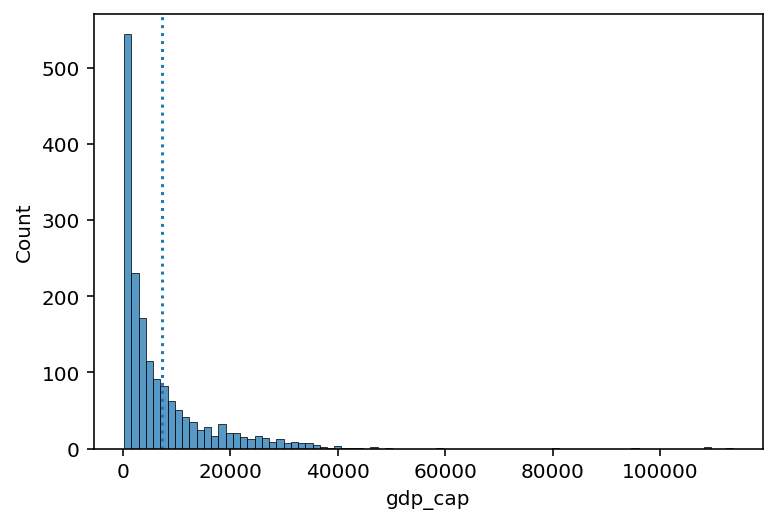

In [9]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted")

#### Check-in

Could you calculate the mean of the `continent` column? Why or why not?

In [10]:
### Your answer here

#### Solution

- You cannot calculate the mean of `continent`, which is a **categorical** variable.
- The `mean` can only be calculated for **continuous** variables.


#### Check-in

- Subtract each observation in `numbers` from the `mean` of this `list`.  
- Then, calculate the **sum** of these deviations from the `mean`.

What is their sum?

In [11]:
numbers = np.array([1, 2, 3, 4])
### Your code here

#### Solution

- The **sum of deviations** from the mean is equal to `0`.  
- This will be relevant when we discuss **standard deviation**. 

In [12]:
deviations = numbers - numbers.mean()
sum(deviations)

0.0

#### Interim summary

- The `mean` is one of the most common measures of central tendency.  
- It can only be used for **continuous** interval/ratio data.  
- The **sum of deviations** from the mean is equal to `0`. 
- The `mean` is most affected by **skew** and **outliers**.

### The *median*

> The **median** is calculated by sorting all values from least to greatest, then finding the value in the middle.

If there is an *even* number of values, you take the `mean` of the middle two values.

In [13]:
df_gapminder['gdp_cap'].median()

3531.8469885

#### Comparing `median` and `mean`

The `median` is less affected by the direction of skew.

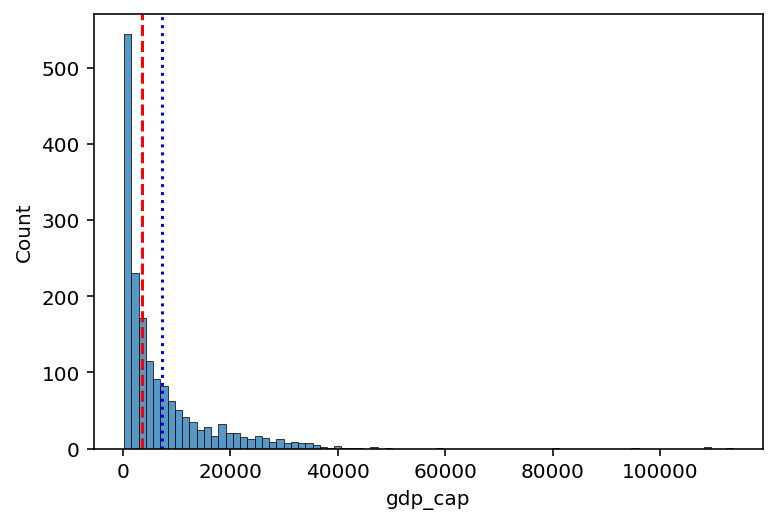

In [14]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted", color = "blue")
plt.axvline(df_gapminder['gdp_cap'].median(), linestyle = "dashed", color = "red")

#### Check-in

Could you calculate the median of the `continent` column? Why or why not?

In [15]:
### Your answer here

#### Solution

- You cannot calculate the median of `continent`, which is a **categorical** variable.
- The `median` can only be calculated for ordinal (ranked) or interval/ratio variables.


### The *mode*

> The **mode** is the most frequent value in a dataset. 

Unlike the `median` or `mean`, the `mode` can be used with **categorical** data.

In [16]:
df_pokemon = pd.read_csv("data/pokemon.csv")
### Most common type = Water
df_pokemon['Type 1'].mode()

0    Water
Name: Type 1, dtype: object

#### `mode()` returns multiple values?

- If multiple values *tie* for the most frequent, `mode()` will return all of them.
- This is because technically, a distribution can have multiple modes!

In [17]:
df_gapminder['gdp_cap'].mode()

0          241.165876
1          277.551859
2          298.846212
3          299.850319
4          312.188423
            ...      
1699     80894.883260
1700     95458.111760
1701    108382.352900
1702    109347.867000
1703    113523.132900
Name: gdp_cap, Length: 1704, dtype: float64

### Central tendency: a summary

|Measure|Can be used for:|Limitations|
|-------|----------------|-----------|
|Mean|Continuous data|Affected by skew and outliers|
|Median|Continuous data|Doesn't include *values* of all data points in calculation (only ranks)|
|Mode|Continuous and Categorical data|Only considers the *most* frequent; ignores other values|

## Variability

> **Variability** (or **dispersion**) refers to the degree to which values in a distribution are *spread out*, i.e., different from each other.

### The `mean` hides variance

Both distributions have the *same* mean, but *different* **standard deviations**.

Text(0.5, 1.0, 'Higher variance')

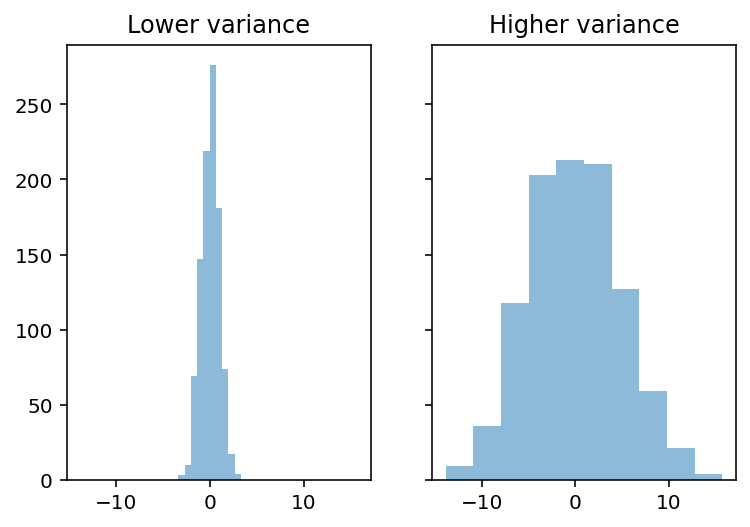

In [18]:
### Create distributions
d1 = np.random.normal(loc = 0, scale = 1, size = 1000)
d2 = np.random.normal(loc = 0, scale = 5, size = 1000)
### Create subplots
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
p1 = axes[0].hist(d1, alpha = .5)
p2 = axes[1].hist(d2, alpha = .5)
axes[0].set_title("Lower variance")
axes[1].set_title("Higher variance")

### Capturing variability

There are at least *three* major approaches to quantifying variability:

- **Range**: the difference between the `maximum` and `minimum` value. 
- **Interquartile range (IQR)**: The range of the middle 50% of data.  
- **Standard deviation**: the typical amount that scores deviate from the mean.

### Range

> **Range** is the difference between the `maximum` and `minimum` value.

Intuitive, but only considers two values in the entire distribution.

In [19]:
d1.max() - d1.min()

6.671539927777442

In [20]:
d2.max() - d2.min()

29.536578725663045

### IQR

> **Interquartile range (IQR)** is the difference between the value at the 75% percentile and the value at the 25% percentile.

Focuses on **middle 50%**, but still only considers two values.

In [21]:
## Get 75% and 25% values
q3, q1 = np.percentile(d1, [75 ,25])
q3 - q1

1.353946514402774

In [22]:
## Get 75% and 25% values
q3, q1 = np.percentile(d2, [75 ,25])
q3 - q1

6.923650741817414

### Standard deviation

> **Standard deviation (SD)** measures the *typical amount* that scores in a distribution deviate from the mean.

Things to keep in mind:

- SD is the *square root* of the [variance](https://en.wikipedia.org/wiki/Variance).  
- There are actually *two* measures of SD:
   - Population SD: when you're measuring the entire population of interest (very rare).  
   - Sample SD: when you're measuring a *sample* (the typical case); we'll focus on this one.

#### Sample SD

The formula for **sample standard deviation** of $X$ is as follows:

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- $n$: number of observations.
- $\bar{X}$: mean of $X$. 
- $X_i - \bar{X}$: difference between a particular value of $X$ and `mean`.
- $\sum$: *sum* of all these squared deviations.

#### Check-in

The formula involves summing the **squared deviations** of each value in $X$ with the mean of $X$. Why do you think we *square* these deviations first?

$\Large\sum{(X_i - \bar{X})^2}$

In [23]:
### Your answer here

#### Solution

If you simply summed the *raw deviations* from the `mean`, you'd get `0` (this is part of the definition of the `mean`).

#### SD, explained

$\Large s = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{n - 1}}$

- First, calculate sum of *squared deviations*.
   - What is total squared deviation from the `mean`? 
- Then, divide by `n - 1`: normalize to number of observations.
   - What is *average* squared deviation from the `mean`?
- Finally, take the *square root*:
   - What is *average* deviation from the `mean`?

**Standard deviation** represents the *typical* or "average" deviation from the `mean`.

#### Calculating SD in `pandas`

In [24]:
df_pokemon['Attack'].std()

32.45736586949843

In [25]:
df_pokemon['HP'].std()

25.534669032332047

#### Watching out for `np.std`

- By default, `numpy.std` will calculate the **population standard deviation**!  
- Must modify the `ddof` parameter to calculate **sample standard deviation**.

This is a very common mistake.

In [26]:
### Pop SD
d1.std()

0.9851116165856464

In [27]:
### Sample SD
d1.std(ddof = 1)

0.9856045421189125

## Detecting (potential) outliers with z-scores

Defining and detecting outliers is notoriously difficult.

- Sometimes, an observation in a histogram clearly *looks* like an outlier. 
- But how do we quantify this?

### What is a z-score?

> A **z-score** is a *standardized* measure of how many any given point deviates from the mean:

$Z = \frac{X - \mu}{\sigma}$

This is useful because it allows us to quantify the **standardized distance** between some observation and the mean.

#### Calculating z-scores

In [43]:
## Original distribution
numbers

array([1, 2, 3, 4])

In [44]:
## z-scored distribution
numbers_z = (numbers - numbers.mean()) / numbers.std(ddof=1)
numbers_z

array([-1.161895  , -0.38729833,  0.38729833,  1.161895  ])

#### Check-in

Can anyone deduce why a z-score would be useful for **defining** outliers?

### Z-scores and outliers

> **Outliers** are data points that differ significantly from other points in a distribution.

- A **z-score** gives us a *standardized measure* of how different a given value is from the rest of the distribution.
- We can define thresholds, e.g.: 

$\Large z ≥ |3|$

### Testing our operationalization

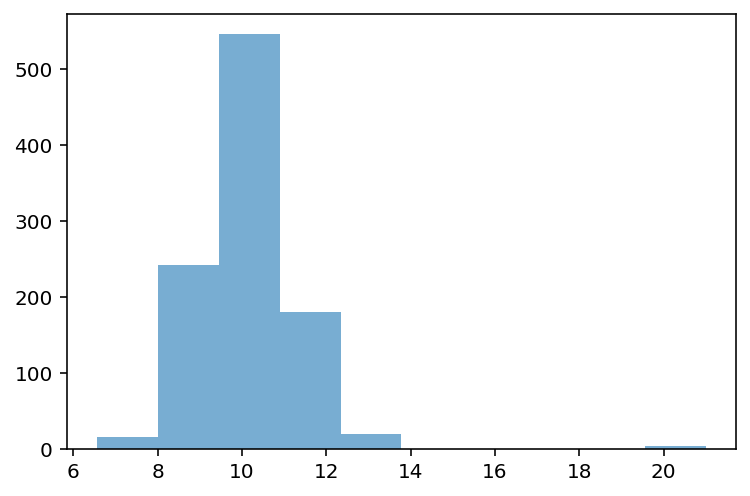

In [45]:
## First, let's define a distribution with some possible outliers
norm = np.random.normal(loc = 10, scale = 1, size = 1000)
upper_outliers = np.array([21, 21, 21, 21]) ## some random outliers
data = np.concatenate((norm, upper_outliers))
p = plt.hist(data, alpha = .6)

#### Z-scoring our distribution

What is the **z-score** of the values way off to the right?

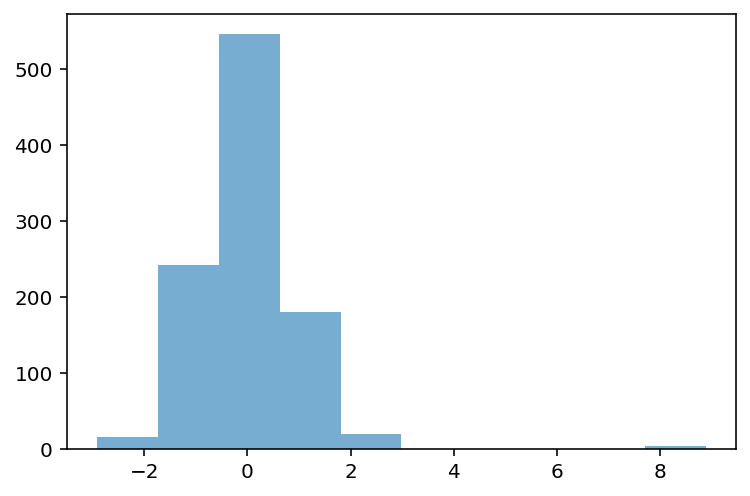

In [46]:
data_z = (data - data.mean()) / data.std(ddof=1)
p = plt.hist(data_z, alpha = .6)

#### Removing outliers

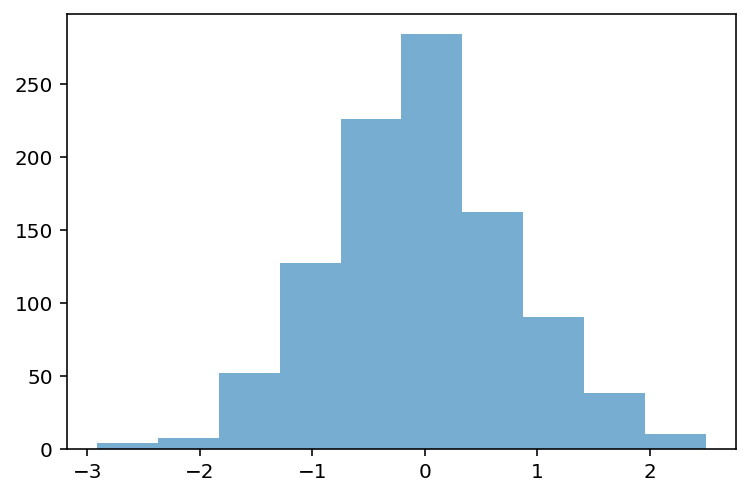

In [47]:
data_z_filtered = data_z[abs(data_z)<=3]
p = plt.hist(data_z_filtered, alpha = .6)

### Check-in

Can anyone think of challenges or problems with this approach to detecting outliers?

### Caveats, complexity, and context

- There is not a single unifying definition of what an outlier is.  
- Depending on the *shape* of the distribution, removing observations where $z > |3|$ might be removing important data. 
   - E.g., in a **skewed** distribution, we might just be "cutting off the tail".  
- Even if the values *do* seem like outliers, there's a philosophical question of **why** and **what that means**.
   - Are those values "random"? What's the underlying **data-generating process*?

This is why statistics is not a mere matter of applying *formulas*. **Context always matters!**

## Describing *bivariate* data with correlations

- So far, we've been focusing on *univariate data*: a single distribution.
- What if we want to describe how *two distributions* relate to each other?
   - For today, we'll focus on *continuous distributions*.

### Bivariate relationships: `height`

- A classic example of **continuous bivariate data** is the `height` of a `parent` and `child`.  
- [These data were famously collected by Karl Pearson](https://www.kaggle.com/datasets/abhilash04/fathersandsonheight).

In [63]:
df_height = pd.read_csv("data/wrangling/height.csv")
df_height.head(2)

,Father,Son
0,65.0,59.8
1,63.3,63.2


#### Plotting Pearson's height data

<AxesSubplot:xlabel='Father', ylabel='Son'>

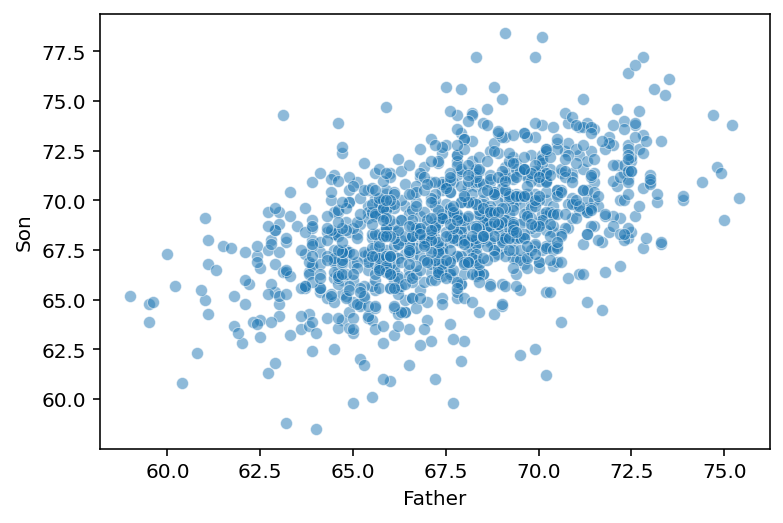

In [64]:
sns.scatterplot(data = df_height, x = "Father", y = "Son", alpha = .5)

### Introducing linear correlations

> A **correlation coefficient** is a number between $[–1, 1]$ that describes the relationship between a pair of variables.

Specifically, **Pearson's correlation coefficient** (or Pearson's $r$) describes a (presumed) *linear* relationship.

Two key properties:

- **Sign**: whether a relationship is positive (+) or negative (–).  
- **Magnitude**: the strength of the linear relationship.

### Calculating Pearson's $r$ with `scipy`

`scipy.stats` has a function called `pearsonr`, which will calculate this relationship for you.

Returns two numbers:

- $r$: the correlation coefficent.  
- $p$: the **p-value** of this correlation coefficient, i.e., whether it's *significantly different* from `0`.

In [65]:
ss.pearsonr(df_height['Father'], df_height['Son'])

(0.5011626808075925, 1.2729275743643463e-69)

#### Check-in

Using `scipy.stats.pearsonr` (here, `ss.pearsonr`), calculate Pearson's $r$ for the relationship between the `Attack` and `Defense` of Pokemon.

- Is this relationship positive or negative?  
- How strong is this relationship?

In [66]:
### Your code here

#### Solution

In [69]:
ss.pearsonr(df_pokemon['Attack'], df_pokemon['Defense'])

(0.4386870551184888, 5.858479864290367e-39)

#### Check-in

Pearson'r $r$ measures the *linear correlation* between two variables. Can anyone think of potential limitations to this approach?

### Limitations of Pearson's $r$

- Pearson's $r$ *presumes* a linear relationship and tries to quantify its strength and direction.  
- But many relationships are **non-linear**!  
- Unless we visualize our data, relying only on Pearson'r $r$ could mislead us.

#### Non-linear data where $r = 0$

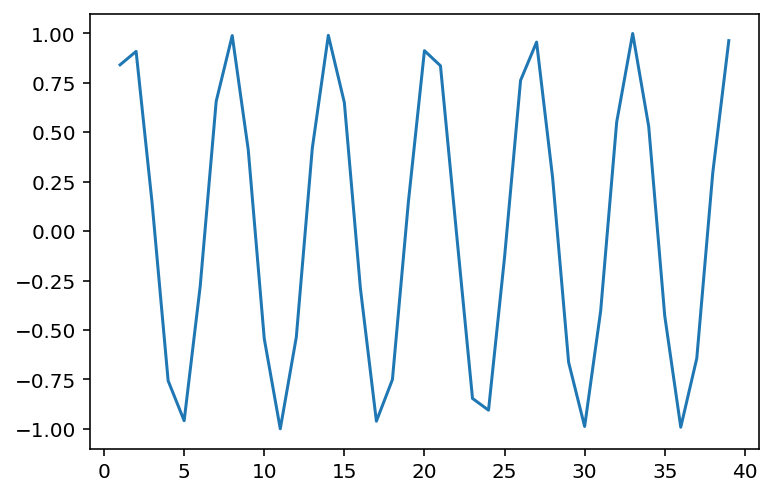

In [83]:
x = np.arange(1, 40)
y = np.sin(x)
p = sns.lineplot(x = x, y = y)

In [86]:
### r is close to 0, despite there being a clear relationship!
ss.pearsonr(x, y)

(-0.04067793461845844, 0.8057827185936633)

#### When $r$ is invariant to the real relationship

All these datasets have roughly the same **correlation coefficient**.

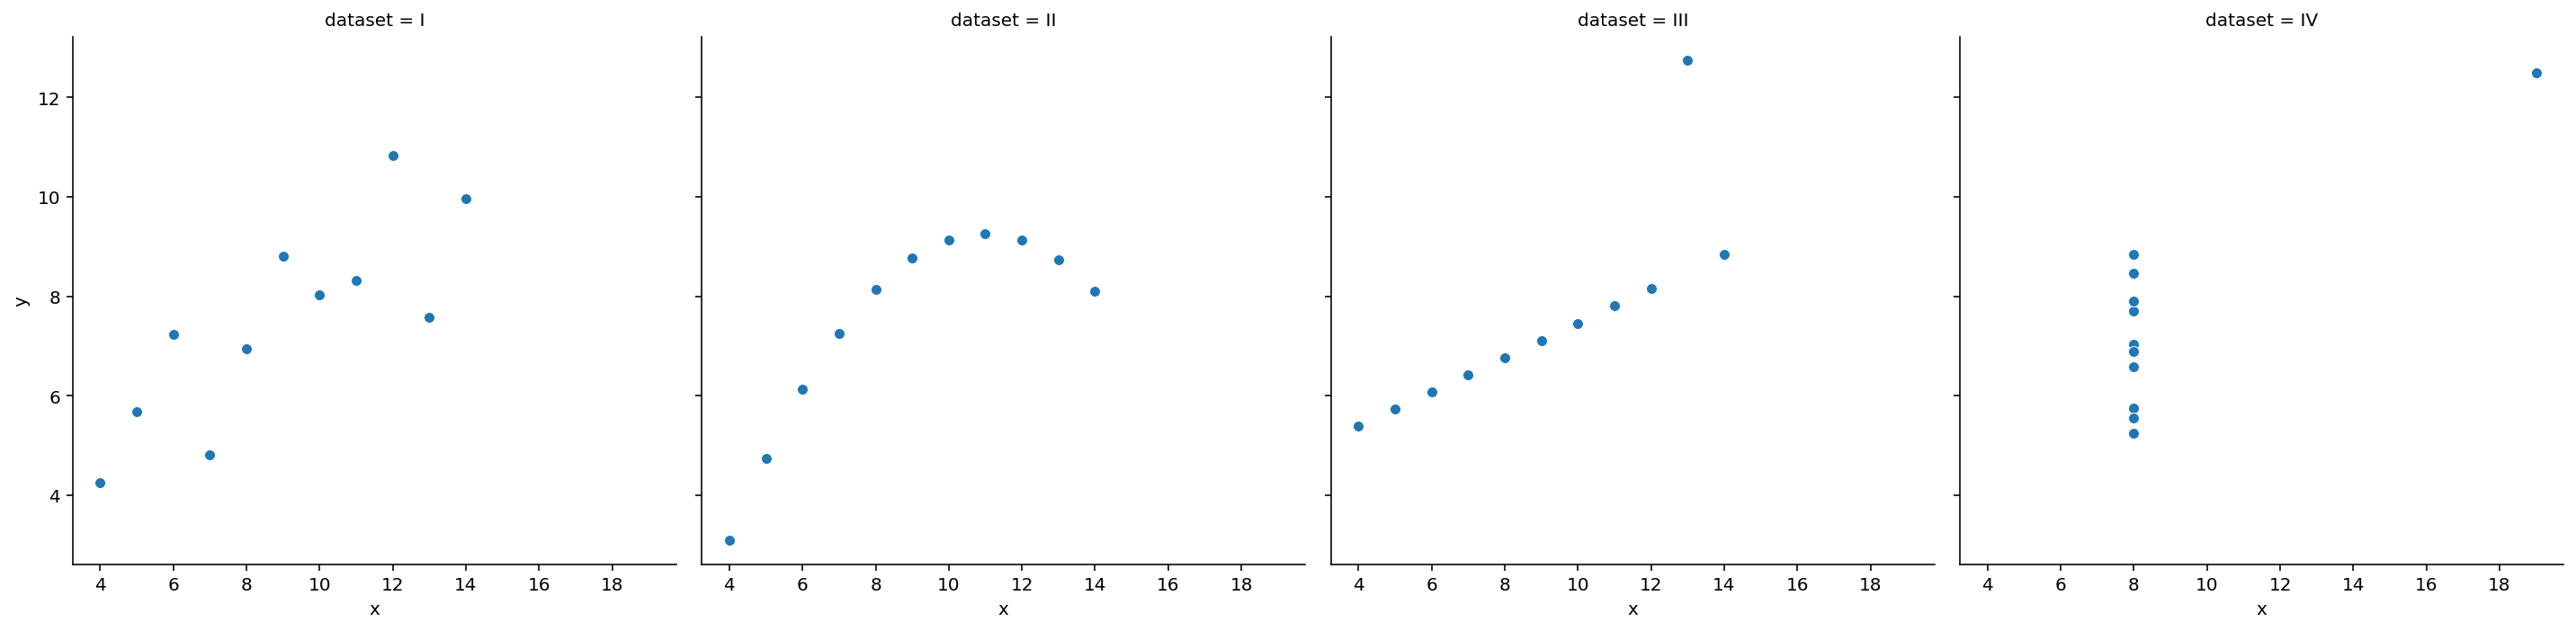

In [87]:
df_anscombe = sns.load_dataset("anscombe")
sns.relplot(data = df_anscombe, x = "x", y = "y", col = "dataset")

## Conclusion

There are many ways to *describe our data*:

- Measuring its **central tendency**.  
- Measuring its **variability**. 
- Measuring how it **correlates** with other data.  

All of these are **useful**, and all are also **simplifications**.